the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_5233/2015068863.py:39: RuntimeWarning: Mean of empty slice
  combined = np.nanmean([reproj1, reproj2], axis=0)


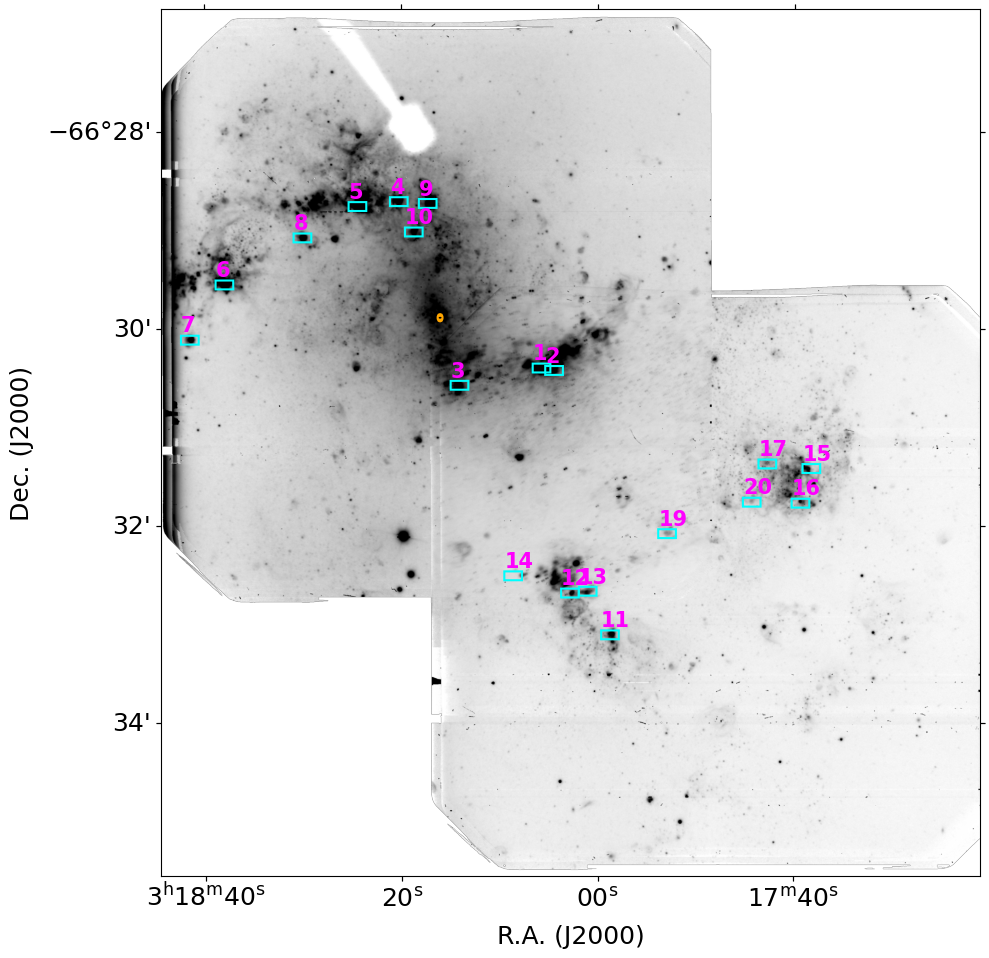

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle, Circle
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs

# Cargar datos
df_gradient = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')
df_slits = pd.read_csv('output_scarano.csv')

# Parámetros de los slits
width_deg = 0.0075
height_deg = 0.0015
ra_center = 49.566875
dec_center = -66.498250
circle_radius_deg = 0.0003

# Cargar imágenes FITS
hdul1 = fits.open('../../../reduccion/mrgS20190730S0157_add.fits')
data1 = hdul1['SCI'].data
wcs1 = WCS(hdul1['SCI'].header)

hdul2 = fits.open('../../../reduccion/mrgS20190730S0160_add.fits')
data2 = hdul2['SCI'].data
wcs2 = WCS(hdul2['SCI'].header)

# Enmascarar valores de bordes
data1 = np.where(data1 == 593.67285, np.nan, data1)
data2 = np.where(data2 == 380.0607, np.nan, data2)

# Reproyectar y combinar imágenes
new_wcs, new_shape = find_optimal_celestial_wcs([(data1, wcs1), (data2, wcs2)])
reproj1, _ = reproject_interp((data1, wcs1), new_wcs, shape_out=new_shape)
reproj2, _ = reproject_interp((data2, wcs2), new_wcs, shape_out=new_shape)
combined = np.nanmean([reproj1, reproj2], axis=0)
combined = np.where(combined > 0, combined, np.nan)

# --- FIGURA PRINCIPAL ---
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection=new_wcs)

# Mostrar imagen de la galaxia
ax1.imshow(
    combined, origin='lower', cmap='gray_r',
    norm=LogNorm(vmin=np.nanpercentile(combined, 1),
                 vmax=np.nanpercentile(combined, 99))
)
ax1.set_xlabel('R.A. (J2000)', fontsize=18)
ax1.set_ylabel('Dec. (J2000)', fontsize=18)
ax1.tick_params(labelsize=18)

# Añadir slits (color fijo, ya no depende de gradiente)
for _, row in df_slits.iterrows():
    ra, dec, slit_id = row['RA'], row['DEC'], row['ID']
    rect = Rectangle(
        (ra - width_deg/2, dec - height_deg/2),
        width_deg, height_deg,
        edgecolor='cyan', facecolor='none', lw=1.5,
        transform=ax1.get_transform('world')
    )
    ax1.add_patch(rect)
    ax1.text(
        ra + width_deg/2, dec + height_deg/2, str(slit_id),
        color='magenta', fontsize=15, transform=ax1.get_transform('world'),
        va='bottom', ha='left', weight='bold'
    )

# Añadir círculo central
circle = Circle(
    (ra_center, dec_center), circle_radius_deg,
    edgecolor='orange', facecolor='none', lw=4,
    transform=ax1.get_transform('world')
)
ax1.add_patch(circle)

# Ajustar límites si es necesario
ax1.set_ylim(440, 3740)

plt.tight_layout()
plt.show()


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_803/1805923838.py:39: RuntimeWarning: Mean of empty slice
  combined = np.nanmean([reproj1, reproj2], axis=0)


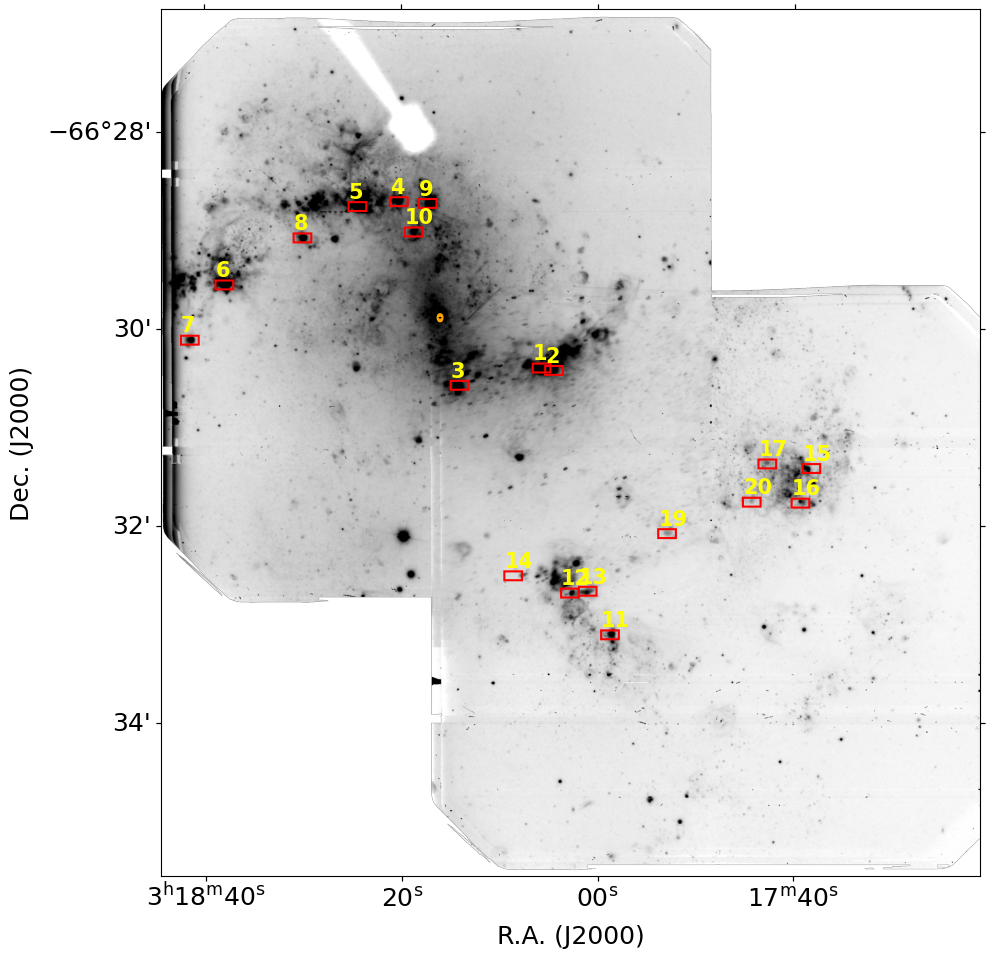

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle, Circle
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs

# Cargar datos
df_gradient = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')
df_slits = pd.read_csv('output_scarano.csv')

# Parámetros de los slits
width_deg = 0.0075
height_deg = 0.0015
ra_center = 49.566875
dec_center = -66.498250
circle_radius_deg = 0.0003

# Cargar imágenes FITS
hdul1 = fits.open('../../../reduccion/mrgS20190730S0157_add.fits')
data1 = hdul1['SCI'].data
wcs1 = WCS(hdul1['SCI'].header)

hdul2 = fits.open('../../../reduccion/mrgS20190730S0160_add.fits')
data2 = hdul2['SCI'].data
wcs2 = WCS(hdul2['SCI'].header)

# Enmascarar valores de bordes
data1 = np.where(data1 == 593.67285, np.nan, data1)
data2 = np.where(data2 == 380.0607, np.nan, data2)

# Reproyectar y combinar imágenes
new_wcs, new_shape = find_optimal_celestial_wcs([(data1, wcs1), (data2, wcs2)])
reproj1, _ = reproject_interp((data1, wcs1), new_wcs, shape_out=new_shape)
reproj2, _ = reproject_interp((data2, wcs2), new_wcs, shape_out=new_shape)
combined = np.nanmean([reproj1, reproj2], axis=0)
combined = np.where(combined > 0, combined, np.nan)

# --- FIGURA PRINCIPAL ---
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection=new_wcs)

# Mostrar imagen de la galaxia
ax1.imshow(
    combined, origin='lower', cmap='gray_r',
    norm=LogNorm(vmin=np.nanpercentile(combined, 1),
                 vmax=np.nanpercentile(combined, 99))
)
ax1.set_xlabel('R.A. (J2000)', fontsize=18)
ax1.set_ylabel('Dec. (J2000)', fontsize=18)
ax1.tick_params(labelsize=18)

# Añadir slits (color fijo, ya no depende de gradiente)
for _, row in df_slits.iterrows():
    ra, dec, slit_id = row['RA'], row['DEC'], row['ID']
    rect = Rectangle(
        (ra - width_deg/2, dec - height_deg/2),
        width_deg, height_deg,
        edgecolor='red', facecolor='none', lw=1.5,
        transform=ax1.get_transform('world')
    )
    ax1.add_patch(rect)
    ax1.text(
        ra + width_deg/2, dec + height_deg/2, str(slit_id),
        color='yellow', fontsize=15, transform=ax1.get_transform('world'),
        va='bottom', ha='left', weight='bold'
    )

# Añadir círculo central
circle = Circle(
    (ra_center, dec_center), circle_radius_deg,
    edgecolor='cyan', facecolor='none', lw=4,
    transform=ax1.get_transform('world')
)
ax1.add_patch(circle)

# Ajustar límites si es necesario
ax1.set_ylim(440, 3740)

plt.tight_layout()
plt.show()


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_803/1674184059.py:40: RuntimeWarning: Mean of empty slice
  combined = np.nanmean([reproj1, reproj2], axis=0)


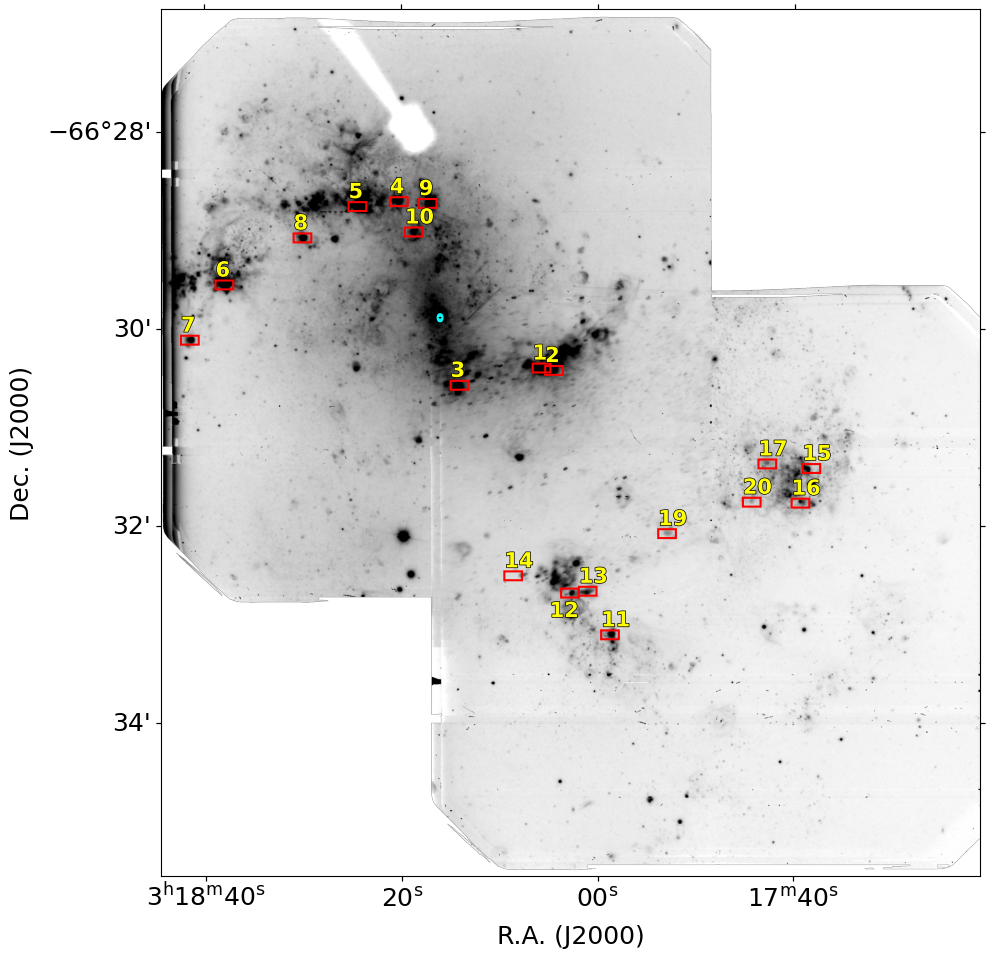

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle, Circle
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs
import matplotlib.patheffects as path_effects

# Cargar datos
df_gradient = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')
df_slits = pd.read_csv('output_scarano.csv')

# Parámetros de los slits
width_deg = 0.0075
height_deg = 0.0015
ra_center = 49.566875
dec_center = -66.498250
circle_radius_deg = 0.0003

# Cargar imágenes FITS
hdul1 = fits.open('../../../reduccion/mrgS20190730S0157_add.fits')
data1 = hdul1['SCI'].data
wcs1 = WCS(hdul1['SCI'].header)

hdul2 = fits.open('../../../reduccion/mrgS20190730S0160_add.fits')
data2 = hdul2['SCI'].data
wcs2 = WCS(hdul2['SCI'].header)

# Enmascarar valores de bordes
data1 = np.where(data1 == 593.67285, np.nan, data1)
data2 = np.where(data2 == 380.0607, np.nan, data2)

# Reproyectar y combinar imágenes
new_wcs, new_shape = find_optimal_celestial_wcs([(data1, wcs1), (data2, wcs2)])
reproj1, _ = reproject_interp((data1, wcs1), new_wcs, shape_out=new_shape)
reproj2, _ = reproject_interp((data2, wcs2), new_wcs, shape_out=new_shape)
combined = np.nanmean([reproj1, reproj2], axis=0)
combined = np.where(combined > 0, combined, np.nan)

# --- FIGURA PRINCIPAL ---
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection=new_wcs)

# Mostrar imagen de la galaxia
ax1.imshow(
    combined, origin='lower', cmap='gray_r',
    norm=LogNorm(vmin=np.nanpercentile(combined, 1),
                 vmax=np.nanpercentile(combined, 99))
)
ax1.set_xlabel('R.A. (J2000)', fontsize=18)
ax1.set_ylabel('Dec. (J2000)', fontsize=18)
ax1.tick_params(labelsize=18)

# Añadir slits y números con borde
for _, row in df_slits.iterrows():
    ra, dec, slit_id = row['RA'], row['DEC'], row['ID']
    rect = Rectangle(
        (ra - width_deg/2, dec - height_deg/2),
        width_deg, height_deg,
        edgecolor='red', facecolor='none', lw=1.5,
        transform=ax1.get_transform('world')
    )
    ax1.add_patch(rect)

# --- Ajuste manual SOLO para el ID 12 ---
    if slit_id == 12:
        txt = ax1.text(
            ra - width_deg/2, dec - height_deg/2 - 0.0006, str(slit_id),
            color='yellow', fontsize=15, transform=ax1.get_transform('world'),
            va='top', ha='right', weight='bold'
        )
    else:
        # posición estándar: arriba a la derecha
        txt = ax1.text(
            ra + width_deg/2, dec + height_deg/2, str(slit_id),
            color='yellow', fontsize=15, transform=ax1.get_transform('world'),
            va='bottom', ha='left', weight='bold'
        )

    # Borde negro alrededor del texto
    txt.set_path_effects([
        path_effects.Stroke(linewidth=1.0, foreground='black'),
        path_effects.Normal()
    ])

# Añadir círculo central
circle = Circle(
    (ra_center, dec_center), circle_radius_deg,
    edgecolor='cyan', facecolor='none', lw=4,
    transform=ax1.get_transform('world')
)
ax1.add_patch(circle)

# Ajustar límites si es necesario
ax1.set_ylim(440, 3740)

plt.tight_layout()
plt.show()
